In [1]:
import os
import tensorboard as tb
import pandas as pd
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

RUNS_DIR = "/notebooks/Thesis/runs/"

plots = [
        "Training vs. Validation Accuracy",
        "Training vs. Validation Precision",
        "Training vs. Validation Recall",
        "Training vs. Validation F1 Score",
        ]

def plotRun(tag, title):
    
    plt.figure(figsize=(4*len(plots),4))
    plt.suptitle(title)
    
    folder = RUNS_DIR + tag + "/"
    i = 0
    for plot in plots:
        i += 1
        subfolder = folder + tag + "_" + plot
        trainfolder = subfolder + "_Training"
        validfolder = subfolder + "_Validation"

        try:
            trainfile = trainfolder + "/" + os.listdir(trainfolder)[0]
            validfile = validfolder + "/" + os.listdir(validfolder)[0]
        except FileNotFoundError:
            continue
            

        ea = event_accumulator.EventAccumulator(trainfile)
        ea.Reload()
        df = pd.DataFrame(ea.Scalars(tag + "/" + plot))
        epochs = df['step'].to_numpy()
        trainValues = df['value'].to_numpy()
        ea = event_accumulator.EventAccumulator(validfile)
        ea.Reload()
        df = pd.DataFrame(ea.Scalars(tag + "/" + plot))
        validValues = df['value'].to_numpy()

        plt.subplot(1, len(plots), i)
        plt.plot(epochs, trainValues, label="Training")
        plt.plot(epochs, validValues, label="Validation")
        plt.ylim([0, 1])
        plt.title(plot[23::])
        plt.xlabel("Epoch")
        plt.legend()

2025-02-02 23:24:47.905005: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-02 23:24:47.969197: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


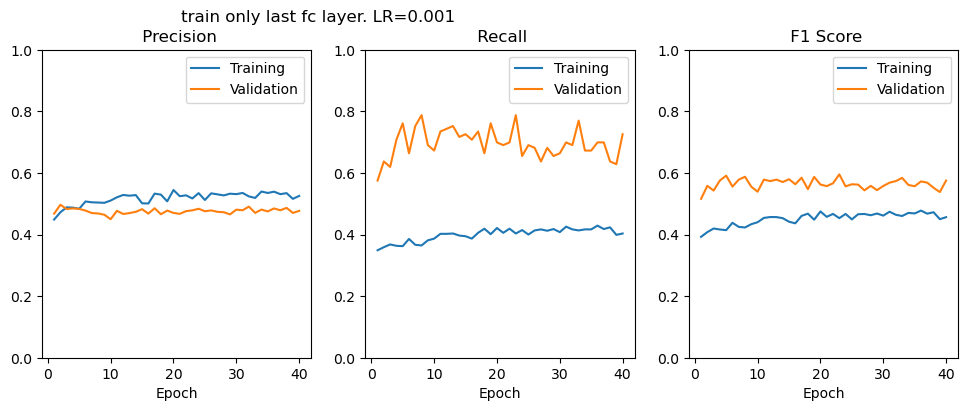

In [2]:
plotRun("exp3", "train only last fc layer. LR=0.001")

LR = 0.001
Sampling method: intervals with only time information (resized frames to 128x171 and center crop to 112x112)

Trained only the last fully connected layer, using the model's convolutional layers as a pretrained fixed feature extractor.

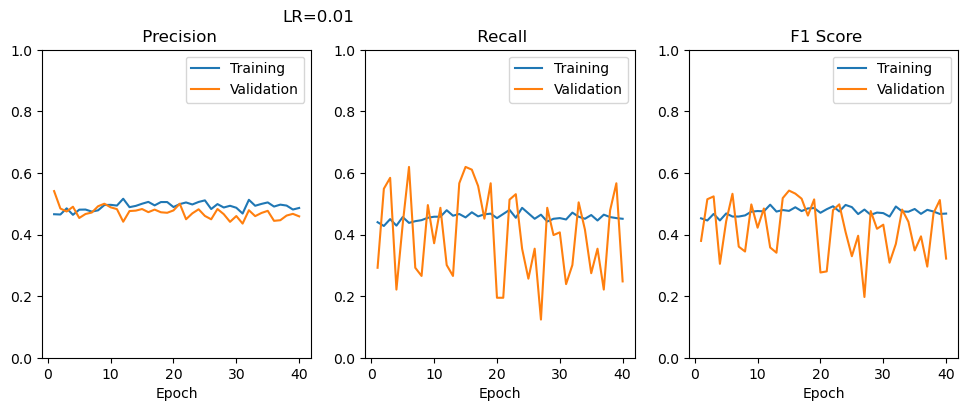

In [3]:
plotRun("exp4", "LR=0.01")

LR = 0.01
sampling method: intervals with only time information (resized frames to 128x171 and center crop to 112x112)

Trained only the last fully connected layer, using the model's convolutional layers as a pretrained fixed feature extractor.

exp3 and exp4 show that the all the model's parameters should be trained and a smaller learning rate should be used

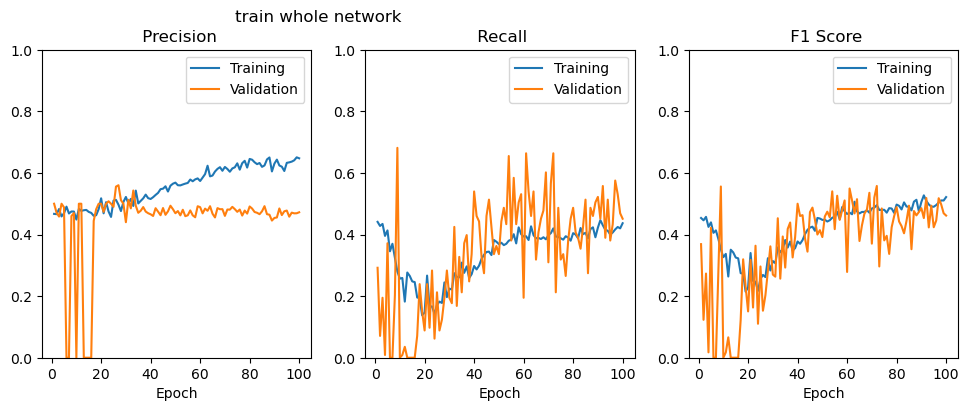

In [4]:
plotRun("exp5", "train whole network")

LR = 0.01
sampling method: intervals with only time information (resized frames to 128x171 and center crop to 112x112)

Trained whole network (same for all subsequent experiments).

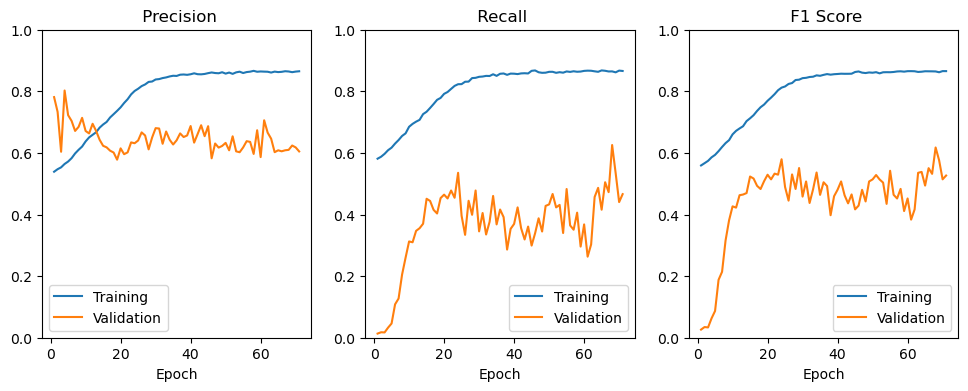

In [5]:
plotRun("exp7", "")

LR = 0.0002
sampling method: windows where each window was 16 frames and separated from each other with a stride of 8 frames. Limited number of frames per video to 600.

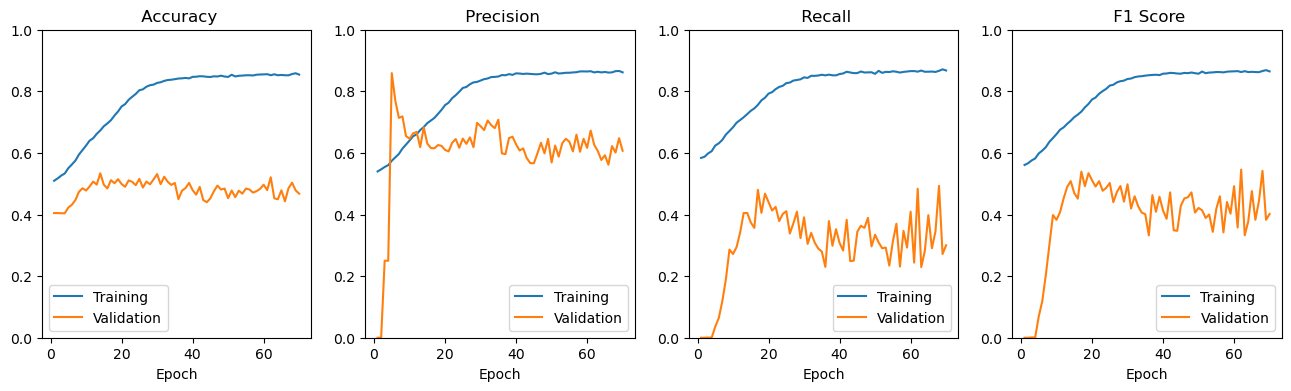

In [6]:
plotRun("exp9", "")

same as exp7 but with BCELoss()

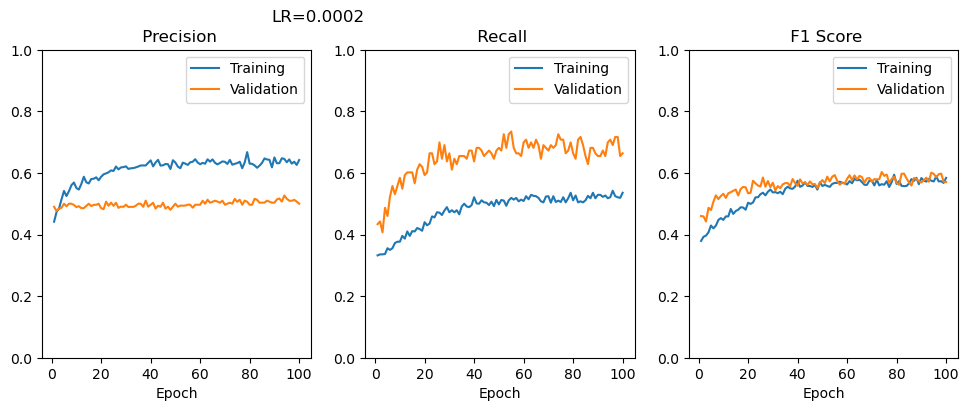

In [7]:
plotRun("exp6", "LR=0.0002")

LR = 0.0002
sampling method: intervals with only time information (resized frames to 128x171 and center crop to 112x112)

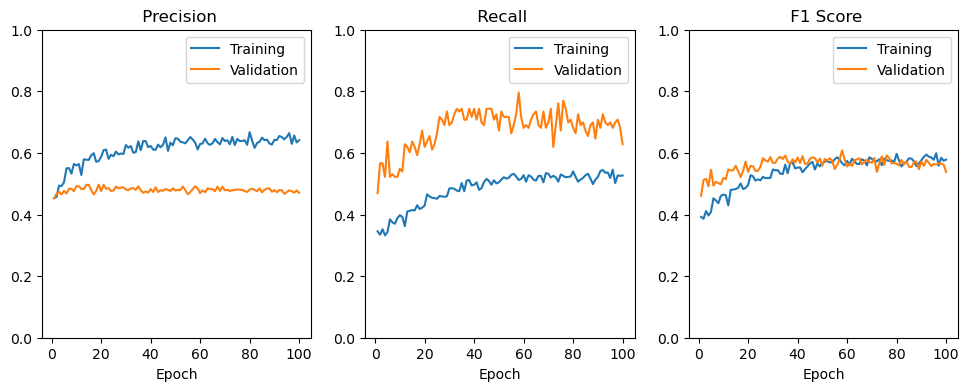

In [8]:
plotRun("exp8", "")

same as exp6 but with BCELoss()

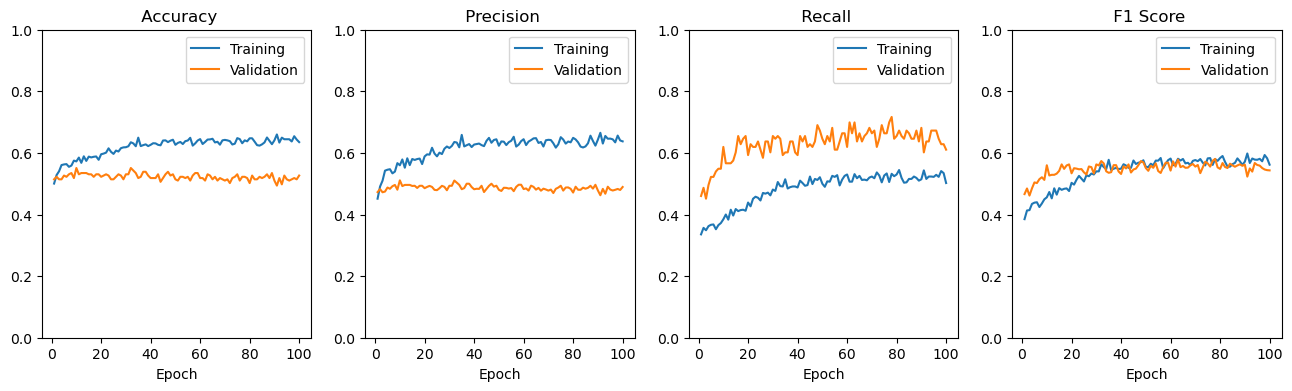

In [9]:
plotRun("exp10", "")

same as exp8 (for accuracy metric)

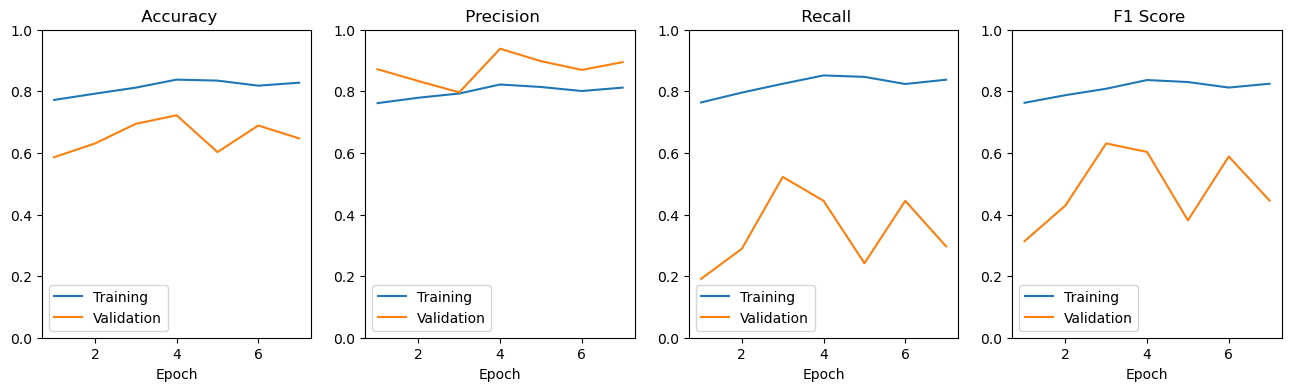

In [10]:
plotRun("cc1", "")

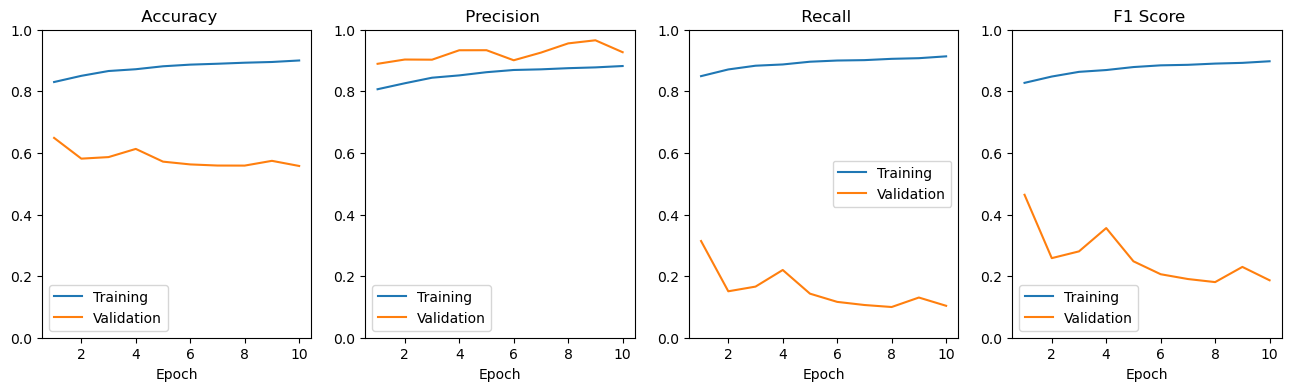

In [11]:
plotRun("cc2", "")

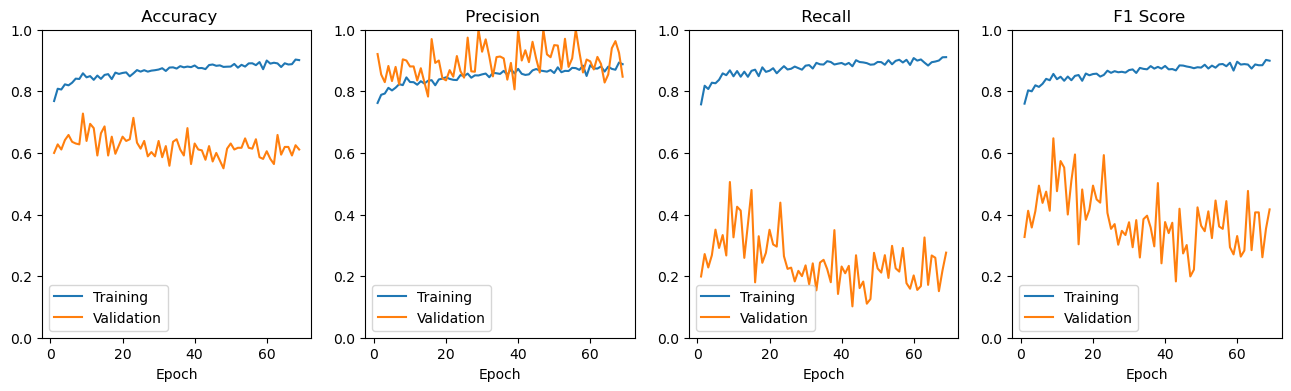

In [12]:
plotRun("cc3", "")

LR = 0.001
using only car/car crashes
nspi(num samples per impact) = 8 (4 crash 4 non crash)
added movement detection for non crash samples
added early impact bias with gaussian for crash samples
added random horizontal flip augmentation 

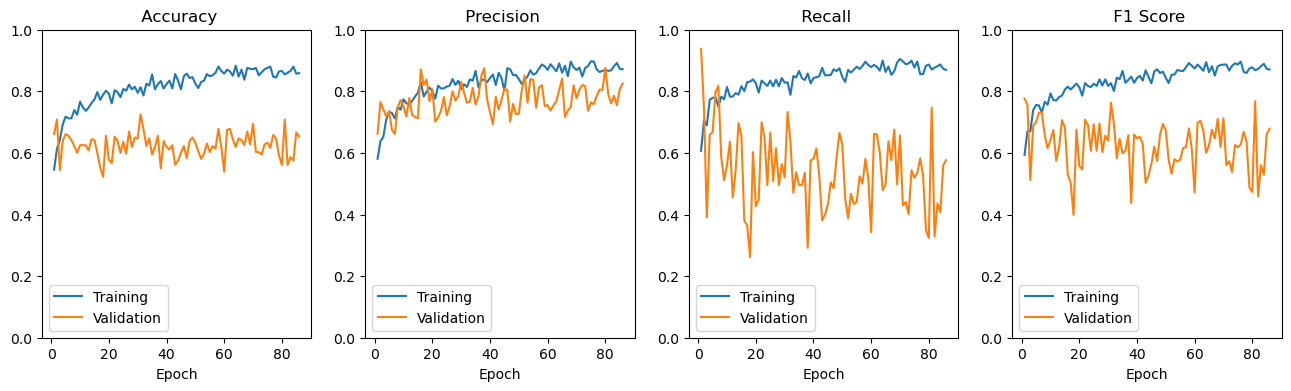

In [13]:
plotRun("cc4", "")

validation nspi = 8. training nspi = 2.

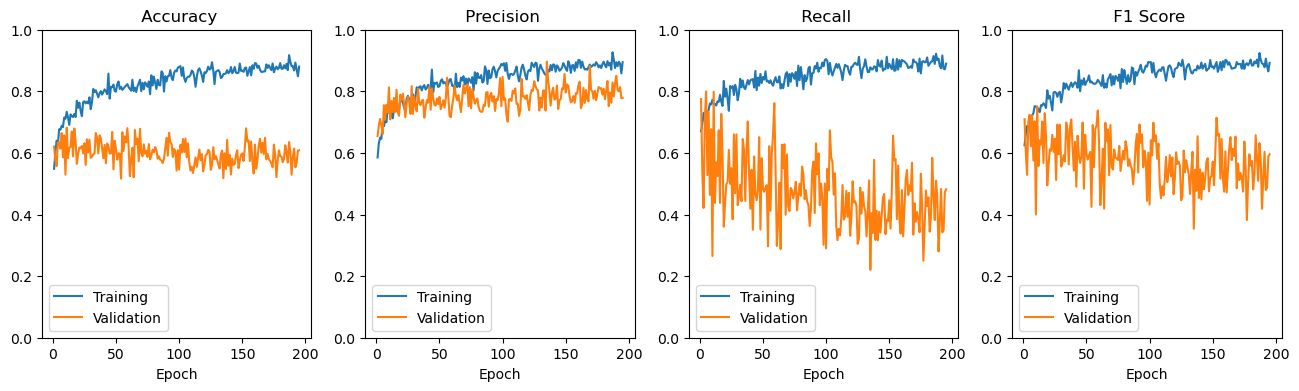

In [14]:
plotRun("rot30", "")

add randomRotation(30) (+- 30 degrees)

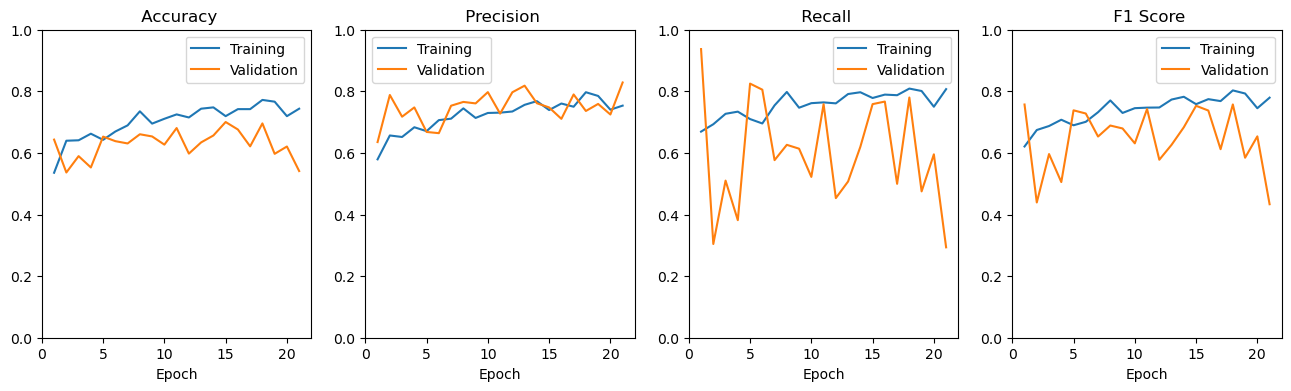

In [15]:
plotRun("rot30p2", "")

validation nspi = 128

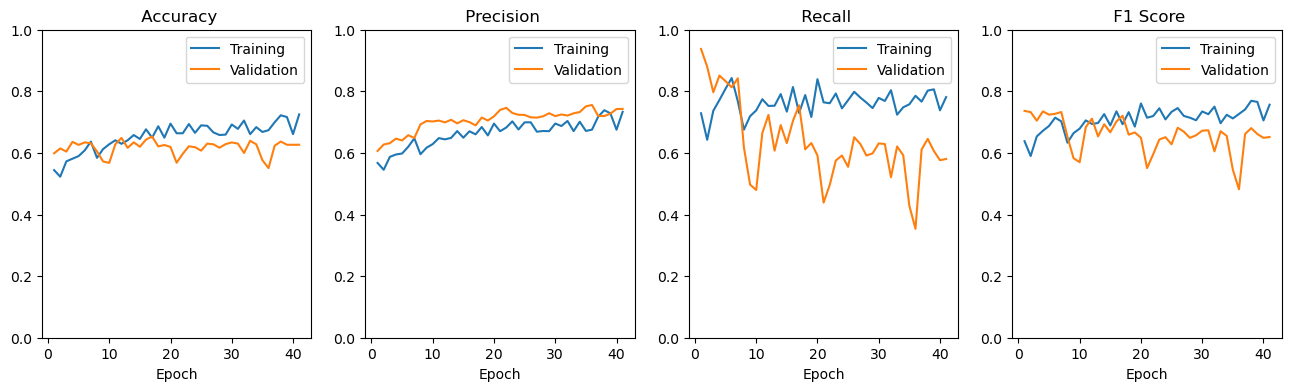

In [16]:
plotRun("rot30p3", "")

LR to 0.0001

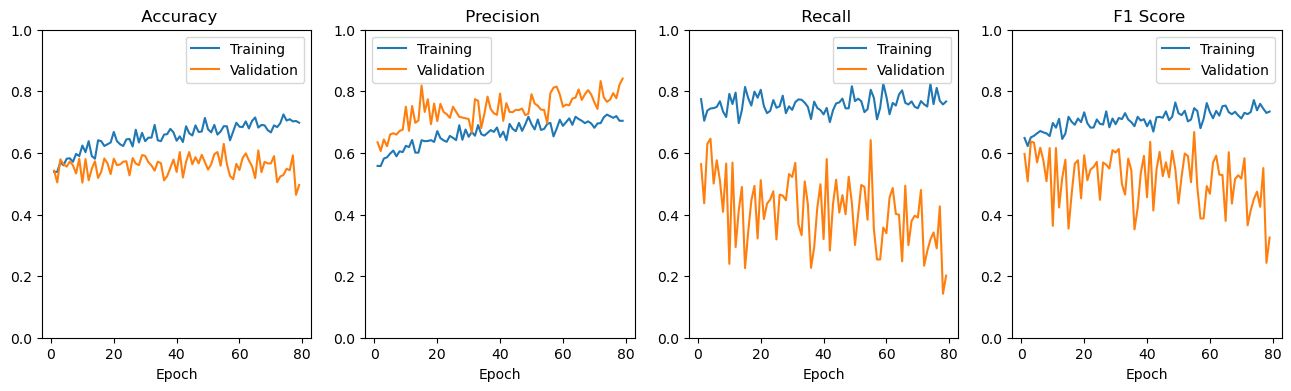

In [17]:
plotRun("aug1", "")

val nspi 32. 
t2.RandomHorizontalFlip(),
t2.RandomRotation(15),
t2.RandomChannelPermutation(),
t2.RandomInvert(),
t2.GaussianBlur(kernel_size=(5,9), sigma=(0.1, 2.0))

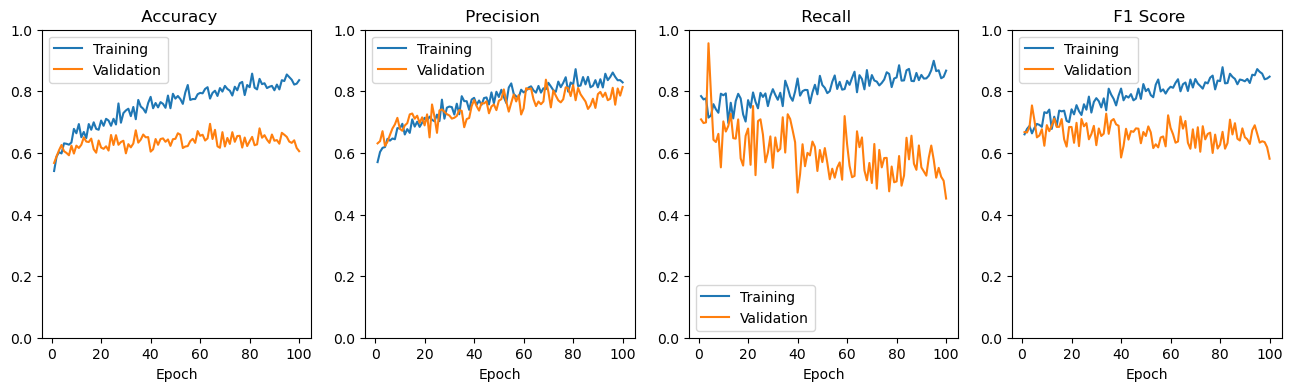

In [18]:
plotRun("aug2", "")

lr to 0.0002
t2.RandomHorizontalFlip(),
t2.RandomRotation(15),
t2.GaussianBlur(kernel_size=(5,9), sigma=(0.1, 2.0))

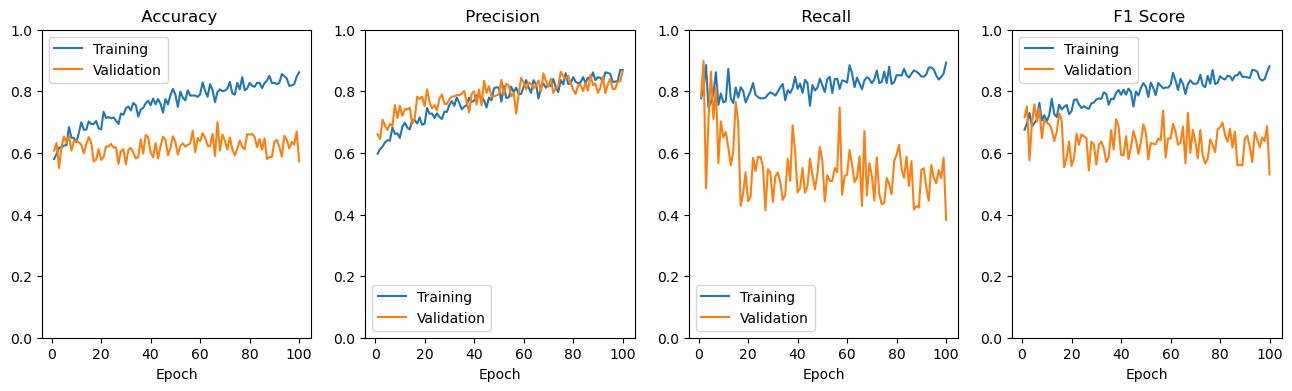

In [20]:
plotRun("aug3", "")

nframes = 32

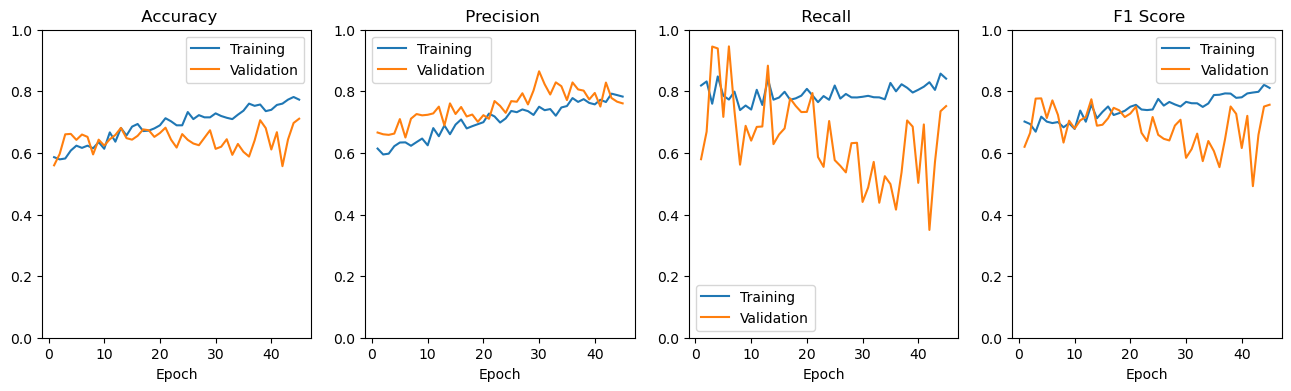

In [21]:
plotRun("aug4", "")

nframes=48. 
removed videos 437022 436703 436814 (nframes<48)

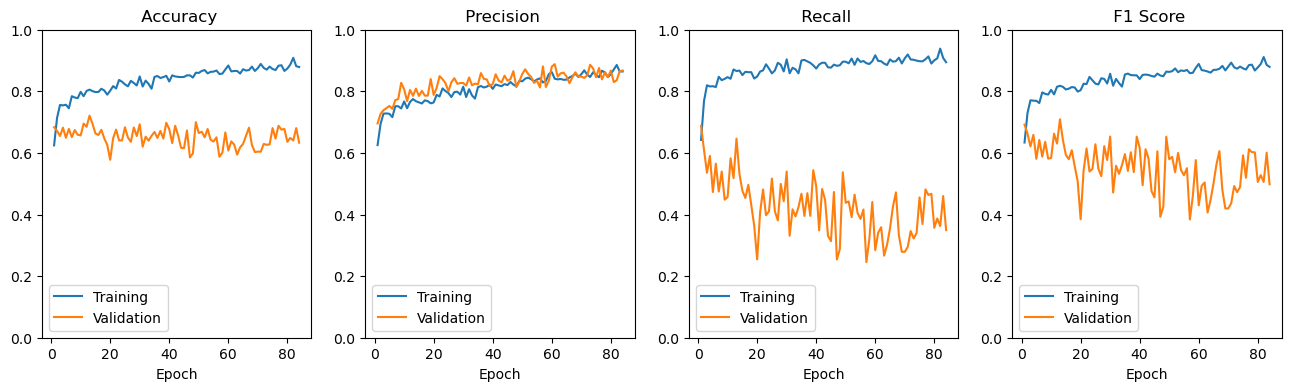

In [22]:
plotRun("aug5", "")

nframes=32. 
readded 437022 436703 436814
added normal videos

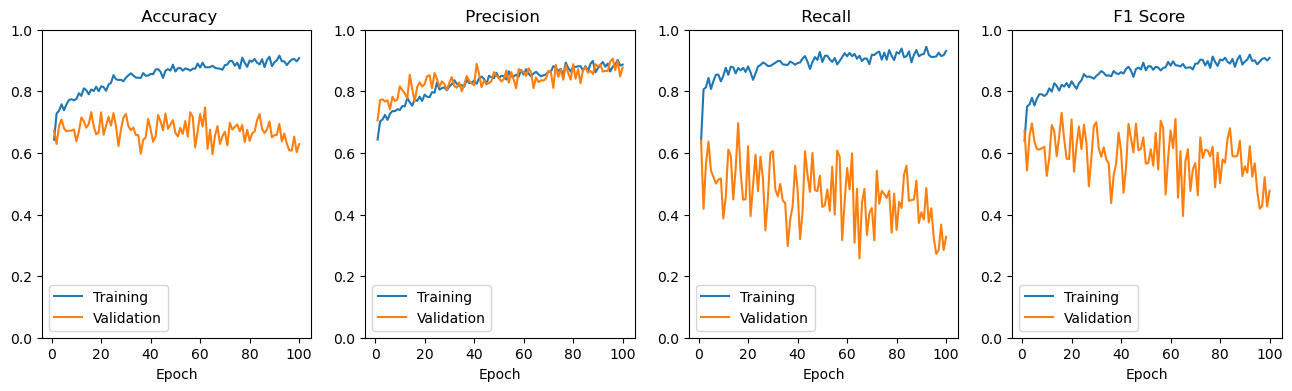

In [23]:
plotRun("aug6", "")

nframes=48. 
removed videos 437022 436703 436814 (nframes<48)
with normal videos

In [ ]:
plotRun("aug4", "")
plotRun("aug6", "")